In [21]:
%matplotlib inline


# Vis Autoselect

In this Demo we will autoselect visualisation depending of the input arrays from ML experiments.

Load Data and train model
-------------------------

We will set the sample inputs here 

In [5]:
# Sample Model 

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)

# y_test right labeled data 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

# y_pred: prediciton for data labeled
y_pred = clf.predict(X_test)

# y_score: confidence scores
y_score = clf.decision_function(X_test)

Accuracy: 
0.7700534759358288
Hamming Loss:
0.22994652406417113


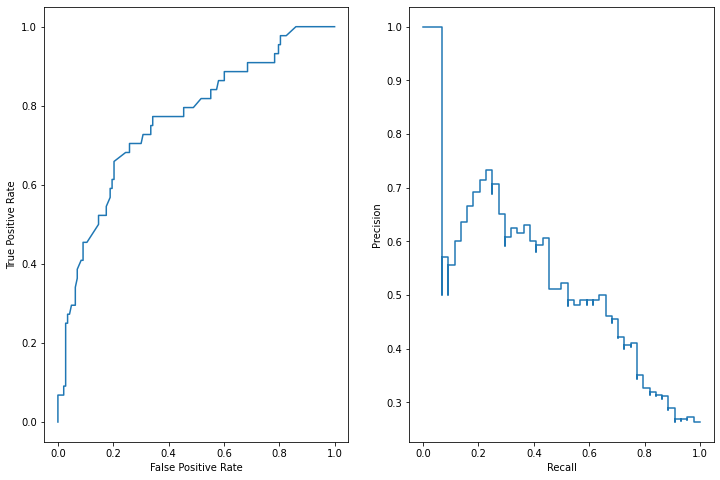

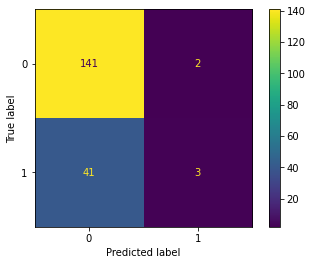

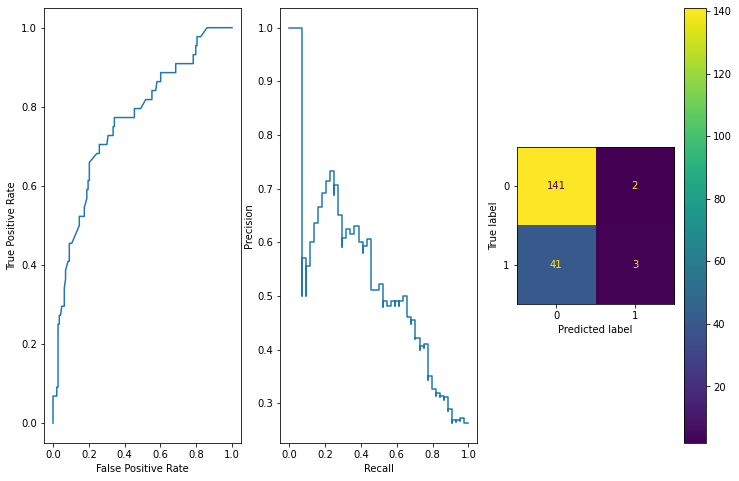

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
import numpy as np

def visualize(y_test, y_pred, y_score):
    
    #print(y_test)
    #print(y_pred)
    #print(y_score)
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm)
    
    # Roc Curve
    fpr, tpr, _ = roc_curve(y_test, y_score, '2')
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    
    # Precision Recall Curve
    prec, recall, _ = precision_recall_curve(y_test, y_score, '2')
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    
    #End Vis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    
    print("Accuracy: ")
    print(accuracy_score(y_test, y_pred))
    
    print("Hamming Loss:")
    print(hamming_loss(y_test, y_pred))

    roc_display.plot(ax=ax1)
    pr_display.plot(ax=ax2)
    # cm_display.plot(ax=ax3)
    plt.show()
    cm_display = ConfusionMatrixDisplay(cm).plot()

visualize(y_test, y_pred, y_score)


# vis in one line 
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
cm_display.plot(ax=ax3)
plt.show()

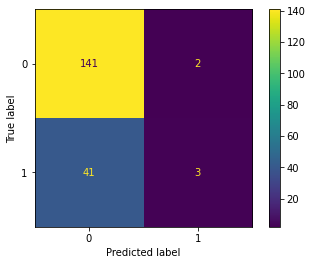

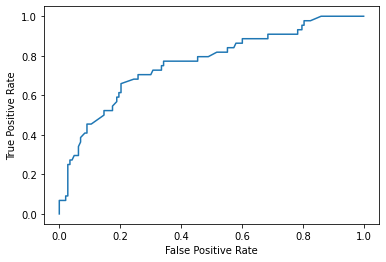

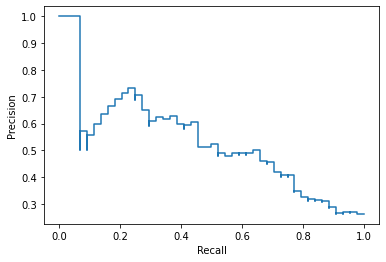

In [126]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()


# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, '2')

roc = np.array([fpr, tpr])

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


# precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


prec, recall, _ = precision_recall_curve(y_test, y_score, '2')
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [21]:
# Data 
test = ['2', '2', '2', '1', '2', '1', '1', '2', '1', '1', '2', '1', '2',
       '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1',
       '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '1', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1',
       '1', '1', '1', '2', '2', '1', '1', '2', '1', '2', '1', '1', '1',
       '1', '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1',
       '1', '1', '1', '1', '1', '1', '2', '2', '1', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1',
       '1', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2',
       '1', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2',
       '2', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1',
       '2', '1', '2', '1', '2']
pred = ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '1',
       '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1',
       '2', '1', '1', '1', '1']
score = [-1.82202743, -1.75880252, -3.03509538, -1.31184273, -1.10285324,
       -0.86641781, -2.00440191, -0.88850565, -1.90127779, -0.17583228,
       -1.19046847, -0.2166087 , -0.6752082 , -2.25109773, -1.99092999,
       -2.02031775,  1.71712201, -0.39091565, -0.92168481, -4.12810471,
       -1.04061515, -0.79391933, -1.88558117, -2.99538356, -2.06996113,
       -3.26390171, -0.50411277, -0.54941637, -2.55160346, -1.65823193,
       -2.25109773, -0.51758469, -1.41189676, -2.51914562, -3.41419346,
       -0.62855712, -2.25109773, -0.63563782, -1.9987783 , -0.16345679,
       -1.67414776,  0.9299132 , -2.02031775, -1.45442761, -0.63563782,
       -3.15278784, -0.42606846, -2.36319843,  0.08225221, -0.78607101,
       -2.62314695, -2.8280477 , -0.45326335, -0.92975233, -0.94544895,
       -5.02045758, -2.9309526 , -0.90540831, -0.36273393, -1.69681548,
       -0.36605507, -2.6063539 , -0.39766752, -2.48851999, -0.35134527,
       -0.98414211, -2.85966016, -1.41814654, -0.5652226 , -2.06933497,
       -1.52360496, -2.40153093,  3.10471612, -1.1986456 , -0.86641781,
       -1.87065216,  1.13616143, -1.66618985, -2.02031775,  0.10835066,
       -1.62650986, -1.83253888, -0.53262331, -2.72503319, -0.38208051,
       -3.04291185, -2.11636116, -1.08402322, -0.48509502, -0.53262331,
       -3.29635955, -0.71587501, -3.25791745, -2.63099526, -2.02031775,
       -2.8280477 , -2.25109773,  2.5499636 ,  0.22826783, -0.51670748,
       -0.53262331, -1.11179798, -0.60380615,  0.25192237, -3.15267824,
       -2.41072672, -4.78967759, -2.52035166, -3.05882769, -1.27139514,
       -1.44336778, -0.46220809, -0.7157654 , -3.54882043, -0.63563782,
       -0.3147672 , -1.4918829 , -1.64341252, -0.86641781, -0.16787436,
       -0.63563782, -1.34148154, -2.76526157, -2.92568965, -1.13567174,
       -1.67414776, -0.21562187, -1.76124644, -2.66293655, -0.86641781,
       -1.11143732, -2.3381964 , -1.13556213, -2.31468331, -2.91773173,
       -1.83929075, -0.69543199, -1.18973269, -1.64231609, -1.36754816,
       -2.02031775, -0.63563782, -2.96267467,  3.55634453, -3.70024045,
       -1.06317326, -0.63563782, -0.54941637, -0.86641781, -0.50188807,
       -0.34937162, -1.31600925, -3.2647471 , -2.10055493, -1.44256869,
       -0.86641781, -1.27825662,  0.45795139, -0.63563782, -2.8280477 ,
       -1.11876908, -1.11953669, -2.18655717, -0.01755078, -3.02710562,
       -0.9496473 , -3.05882769,  0.32774199, -1.78256666, -0.75102781,
       -1.86977494, -1.67414776, -3.05882769, -2.32253162, -2.06883287,
       -1.1673938 , -2.91773173,  0.23512932, -0.71587501, -1.61610803,
       -0.4147894 , -1.4996216 ,  1.18701086, -0.54551536, -0.6681275 ,
       -1.7033163 , -0.23241493]

cm = [[136,   6],
       [ 37,   8]]


roc = [[0.        , 0.00704225, 0.00704225, 0.01408451, 0.01408451,
        0.03521127, 0.03521127, 0.04225352, 0.04225352, 0.05633803,
        0.05633803, 0.06338028, 0.06338028, 0.08450704, 0.08450704,
        0.1056338 , 0.1056338 , 0.11971831, 0.11971831, 0.14084507,
        0.14788732, 0.15492958, 0.15492958, 0.15492958, 0.16197183,
        0.16197183, 0.1971831 , 0.1971831 , 0.21126761, 0.22535211,
        0.22535211, 0.23943662, 0.26760563, 0.26760563, 0.27464789,
        0.27464789, 0.30985915, 0.30985915, 0.31690141, 0.31690141,
        0.37323944, 0.37323944, 0.45774648, 0.45774648, 0.51408451,
        0.52816901, 0.54225352, 0.54225352, 0.54929577, 0.54929577,
        0.55633803, 0.55633803, 0.6056338 , 0.64084507, 0.64084507,
        0.66901408, 0.6971831 , 0.80985915, 0.83098592, 0.83802817,
        0.85211268, 0.88732394, 0.88732394, 0.8943662 , 0.91549296,
        1.        ],
        [0.        , 0.        , 0.08888889, 0.08888889, 0.13333333,
        0.13333333, 0.17777778, 0.17777778, 0.22222222, 0.22222222,
        0.24444444, 0.24444444, 0.26666667, 0.26666667, 0.35555556,
        0.35555556, 0.37777778, 0.37777778, 0.4       , 0.4       ,
        0.44444444, 0.44444444, 0.48888889, 0.51111111, 0.51111111,
        0.53333333, 0.57777778, 0.62222222, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.68888889, 0.71111111, 0.71111111,
        0.73333333, 0.73333333, 0.75555556, 0.75555556, 0.77777778,
        0.77777778, 0.8       , 0.8       , 0.82222222, 0.82222222,
        0.84444444, 0.84444444, 0.86666667, 0.86666667, 0.91111111,
        0.91111111, 0.93333333, 0.93333333, 0.93333333, 0.97777778,
        0.97777778, 0.97777778, 0.97777778, 0.97777778, 0.97777778,
        0.97777778, 0.97777778, 1.        , 1.        , 1.        ,
        1.        ]]

In [41]:
import numpy as np

def contains_type(type, data):
    return all(isinstance(item, type) for item in data)

contains_type(list, cm.tolist())

isinstance(cm, np.ndarray)

True

In [127]:
roc

array([[0.        , 0.        , 0.        , 0.02097902, 0.02097902,
        0.02797203, 0.02797203, 0.03496503, 0.03496503, 0.04195804,
        0.04895105, 0.06293706, 0.06293706, 0.06993007, 0.06993007,
        0.08391608, 0.09090909, 0.09090909, 0.1048951 , 0.14685315,
        0.14685315, 0.15384615, 0.17482517, 0.17482517, 0.18881119,
        0.18881119, 0.1958042 , 0.1958042 , 0.2027972 , 0.2027972 ,
        0.24475524, 0.25874126, 0.25874126, 0.3006993 , 0.30769231,
        0.33566434, 0.33566434, 0.34265734, 0.34265734, 0.45454545,
        0.45454545, 0.48951049, 0.51748252, 0.55244755, 0.55244755,
        0.57342657, 0.58041958, 0.6013986 , 0.6013986 , 0.62937063,
        0.65734266, 0.67132867, 0.68531469, 0.68531469, 0.72027972,
        0.76923077, 0.78321678, 0.78321678, 0.7972028 , 0.7972028 ,
        0.8041958 , 0.8041958 , 0.82517483, 0.86013986, 0.87412587,
        0.88111888, 0.8951049 , 0.91608392, 0.94405594, 1.        ],
       [0.        , 0.02272727, 0.06818182, 0.0

In [150]:
import os
import vis_autselect.visualize as visualize
import importlib

# set import path
project_dir = os.path.abspath("..")

# reload package - development
importlib.reload(visualize)


#help(visualize)

# Example Classifier
vis = visualize.Visualizer()
vis.select(y_test)
vis.select(y_pred)
vis.select(y_score)
vis.select(cm)
vis.select(roc)

#vis.info()


# Example annotated
vis.delete_data()

annotaded_data = {
    'Confidence Scores': y_score, 
    'Confusion Matrix' : cm,
    'ROC' : roc,
    'Ground Truth Values' : y_pred, 
    'Predictions' : y_pred
}

vis.input_dict(annotaded_data)
vis.info()
vis.visualize()


# todo match for visualizations!  then actual visualizations

The following arrays have beem classified:  ['Confidence Scores', 'Confusion Matrix', 'ROC', 'Ground Truth Values', 'Predictions'] 

['ROC']
['Ground Truth Values', 'Confidence Scores']
['Confusion Matrix']
['Ground Truth Values', 'Predictions']


In [115]:
roc = None

In [1]:
# write about true classes 


test = [[2, 3, 3], [2]]